## 1
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

Bangalore 635


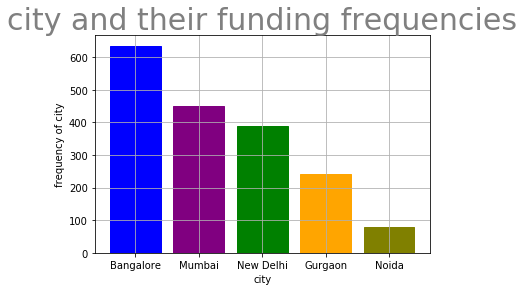

In [41]:
import csv
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

df=pd.read_csv("startup_funding.csv",header=0)
df.dropna(subset=['CityLocation'],inplace=True)      #dropping the empty values in Citylocation column
#df.dropna(subset=['AmountInUSD'],inplace=True)

df['CityLocation']=df['CityLocation'].apply(lambda x:x.split('/')[0].strip())  #taking the left part of the string separarted by '/'
#correcting the spelling of the cities
df['CityLocation']=df['CityLocation'].apply(lambda x:x.replace("bangalore","Bangalore"))
df['CityLocation']=df['CityLocation'].apply(lambda x:x.replace("New Delhi","Delhi"))
df['CityLocation']=df['CityLocation'].apply(lambda x:x.replace("Delhi","New Delhi"))


#retrieving the columns where CityLocation corresponds to the desired cities
cl=df[(df['CityLocation']=='Bangalore') | (df['CityLocation']=='New Delhi') | (df['CityLocation']=='Mumbai')|(df['CityLocation']=='Noida') |(df['CityLocation']=='Gurgaon') ]

dict={}   #a dictionary for storing the frequencies of the cities

#calculation the frequencies
for i in range(0,len(cl)):
    dict[cl.iloc[i,5]]=dict.get(cl.iloc[i,5],0)+1

ct=dict.keys()
count=dict.values()
color={"red", "blue" "purple", "black", "green"}
max=0

#calculating max frequency
for i in dict:
    if dict[i]>max:
        max=dict[i]
        city=i
print(city,max)    #desired answer

#plotting graph for the five cities
barlist=plt.bar(ct,count,edgecolor="black")
barlist[0].set_color('blue')
barlist[1].set_color('purple')
barlist[2].set_color('green')
barlist[3].set_color('orange')
barlist[4].set_color('olive')
plt.title("city and their funding frequencies",fontsize=30,color='grey')
plt.ylabel("frequency of city")
plt.xlabel("city")
plt.grid()
plt.show()


## 2
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


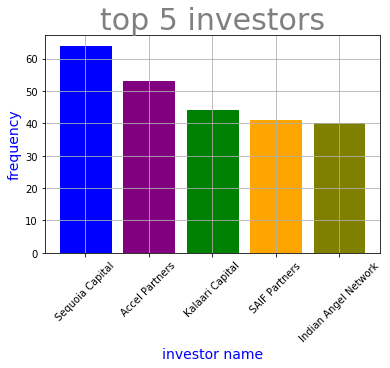

In [63]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv",header=0)
#dropping the rows with null values in the InvestorName column
df.dropna(subset=['InvestorsName'],inplace=True)

#taking all values except the undisclosed investors
df=df[(df.InvestorsName!="Undisclosed Investors") & (df.InvestorsName!="Undisclosed investors") & (df.InvestorsName!="undisclosed investors")]

c=[]
#appending the investor names in a list c
for i in df['InvestorsName']:
    a=i.split(',')
    for j in a:
        c.append(j.strip())
dict={}
#calculation the frequencies of each investor and storing it in dictionary dict
for i in c:
    dict[i]=dict.get(i,0)+1

#took help of the Counter to find the top five investor names
k = Counter(dict) 
high = k.most_common(5)
for i in high:
    print(i[0],i[1])  #printing the answers(top five investors)


name=[]
count=[]
#appending those five names and thier frequencis in the lists name and count respectively
for i in high:
    name.append(i[0])
    count.append(i[1])
    
#plotting a bar graph based on the five investors stored in names and count lists
barlist=plt.bar(name,count)
plt.title("top 5 investors", fontsize=30,color="grey")
plt.xlabel("investor name",fontsize=14,color="blue")
plt.ylabel("frequency",fontsize=14, color="blue")
barlist[0].set_color("blue")
barlist[1].set_color("purple")
barlist[2].set_color("green")
barlist[3].set_color("orange")
barlist[4].set_color("olive")
plt.grid()
plt.xticks(rotation=45)
plt.show()

## 3
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Accel 66
Sequoia Capital 55
Kalaari Capital 46
Blume Ventures 42
Indian Angel Network 42


<IPython.core.display.Javascript object>


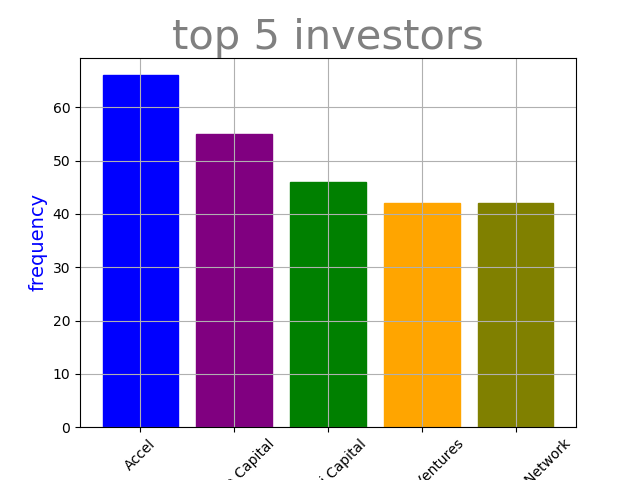

In [8]:
%matplotlib notebook
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv")
#dropping row with nan values in the StartupName and InvestorName column
df.dropna(subset=['StartupName'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

#neglecting the undisclosed invetsors
df=df[(df.InvestorsName!="Undisclosed") & (df.InvestorsName!="Undisclosed Investors") & (df.InvestorsName!="Undisclosed investors") & (df.InvestorsName!="undisclosed investors")]

#correcting names  of the important companies 
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Ola Cabs","Ola"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Olacabs","Ola"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Oyo Rooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("OyoRooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Oyorooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("OYO Rooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Flipkart.com","Flipkart"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Paytm Marketplace","Paytm"))

#replaced all Accel related companies to Accel for the user's convenience
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accel Partner","Accel"))
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accel Partners","Accel"))
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accels","Accel"))


s=[]
#appending the names of all investors ina list named  s
for i in df.InvestorsName:
    if "," in i:
        f=i.split(",")    #handled multivalued cells
        for j in f:
            s.append(j.strip())
    else:
        s.append(i)
#got the names of unique investors in the array uni
uni=np.unique(s)
l=[]
d={}

#for each investor we will scan the data and store the startups in which they have invested in the list l
# we then store the count of the unique count of the starups in the dictionary d for each investor
for i in uni:
    for j in range(len(df)):
        if i in df.iloc[j,6]:
            l.append(df.iloc[j,2])
    d[i]=d.get(i,0)+len(np.unique(l))
    l=[]
    
#deleting null and unwanted values from the dictionary d
del d['']
del d['Others']
del d['& Others']

#counting the top five investors
k = Counter(d) 
high = k.most_common(5)
for i in high:
    print(i[0],i[1])    #desired answer(top five investors who have invested in different startups
name=[]
count=[]
#appending the top five investors in name and count respectively
for i in high:
    name.append(i[0])
    count.append(i[1])

#plotting a bar graph for the top five investors
barlist=plt.bar(name,count)
plt.title("top 5 investors", fontsize=30,color="grey")
plt.xlabel("investor name",fontsize=14,color="blue")
plt.ylabel("frequency",fontsize=14, color="blue")
barlist[0].set_color("blue")
barlist[1].set_color("purple")
barlist[2].set_color("green")
barlist[3].set_color("orange")
barlist[4].set_color("olive")
plt.grid()
plt.xticks(rotation=45)
plt.show()

## 4
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
Mohandas Pai 20
LetsVenture 19
Rohit 19


<IPython.core.display.Javascript object>


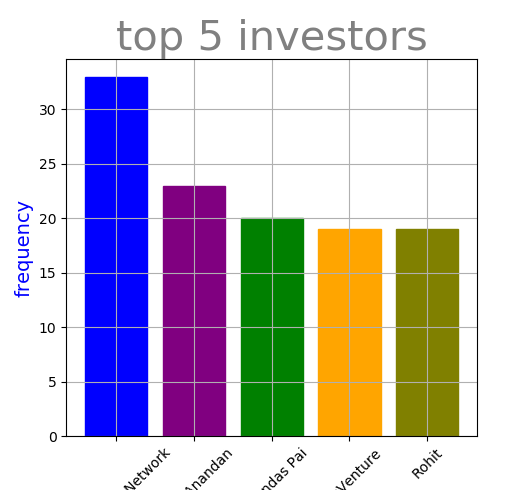

In [7]:
%matplotlib notebook
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv",header=0)
#dropping row with nan values in the StartupName,InvestmentType and InvestorName column
df.dropna(subset=['StartupName'],inplace=True)
df.dropna(subset=['InvestmentType'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

#correcting names  of the important companies 
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Ola Cabs","Ola"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Olacabs","Ola"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Oyo Rooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("OyoRooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Oyorooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("OYO Rooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Flipkart.com","Flipkart"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Paytm Marketplace","Paytm"))
#replaced all Accel related companies to Accel for the user's convenience
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accel Partner","Accel"))
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accel Partners","Accel"))
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accels","Accel"))
#replacing the funding name swith their correct spellings
df['InvestmentType']=df['InvestmentType'].apply(lambda x:x.replace("PrivateEquity","Private Equity"))
df['InvestmentType']=df['InvestmentType'].apply(lambda x:x.replace("SeedFunding","Seed Funding"))
df['InvestmentType']=df['InvestmentType'].apply(lambda x:x.replace("Crowd funding","Crowd Funding"))

#neglecting the undisclosed invetsors
df=df[(df.InvestorsName!="Undisclosed") & (df.InvestorsName!="Undisclosed Investors") & (df.InvestorsName!="Undisclosed investors") & (df.InvestorsName!="undisclosed investors")]

s=[]

#appending the names of all investors ina list named  s
for i in df.InvestorsName:
    if "," in i:
        f=i.split(",")    #handling multi-valued cells
        for j in f:
            s.append(j.strip())
    else:
        s.append(i)
#got the names of unique investors in the array uni
uni=np.unique(s)
l=[]
d={}

#for each investor we will scan the data and store the startups in which they have invested in the list l
# we then store the count of the unique count of the starups in the dictionary d for each investor
for i in uni:
    for j in range(len(df)):
        if i in df.iloc[j,6]:
            #condition for selecting only seed funding and crowd funding records
            if df.iloc[j,7]=='Seed Funding' or df.iloc[j,7]=='Crowd Funding':
                l.append(df.iloc[j,2])
    d[i]=d.get(i,0)+len(np.unique(l))
    l=[]
#deleting null and unwanted values from the dictionary d
del d['']
del d['Others']
del d['& Others']

#counting the top five investors
k = Counter(d) 
high = k.most_common(5)
for i in high:
    print(i[0],i[1])    #desired answer(top five investors who have invested in different startups
name=[]
count=[]
#appending the top five investors in name and count respectively
for i in high:
    name.append(i[0])
    count.append(i[1])

#plotting a bar graph for the top five investors
barlist=plt.bar(name,count)
plt.title("top 5 investors", fontsize=30,color="grey")
plt.xlabel("investor name",fontsize=14,color="blue")
plt.ylabel("frequency",fontsize=14, color="blue")
barlist[0].set_color("blue")
barlist[1].set_color("purple")
barlist[2].set_color("green")
barlist[3].set_color("orange")
barlist[4].set_color("olive")
plt.grid()
plt.xticks(rotation=45)
plt.show()

## 5
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Accel 52
Sequoia Capital 52
Kalaari Capital 39
Tiger Global 35
IDG 31


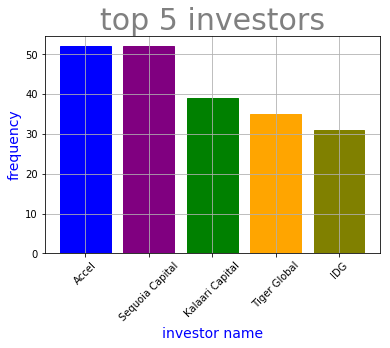

In [6]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
df=pd.read_csv("startup_funding.csv",header=0)
#dropping row with nan values in the StartupName,InvestmentType and InvestorName column
df.dropna(subset=['StartupName'],inplace=True)
df.dropna(subset=['InvestmentType'],inplace=True)
df.dropna(subset=['InvestorsName'],inplace=True)

#correcting names  of the important companies 
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Ola Cabs","Ola"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Olacabs","Ola"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Oyo Rooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("OyoRooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Oyorooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("OYO Rooms","Oyo"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Flipkart.com","Flipkart"))
df['StartupName']=df['StartupName'].apply(lambda x:x.replace("Paytm Marketplace","Paytm"))

#replaced all Accel related companies to Accel for the user's convenience
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accel Partner","Accel"))
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accel Partners","Accel"))
df['InvestorsName']=df['InvestorsName'].apply(lambda x:x.replace("Accels","Accel"))
#replacing the funding name swith their correct spellings
df['InvestmentType']=df['InvestmentType'].apply(lambda x:x.replace("PrivateEquity","Private Equity"))
df['InvestmentType']=df['InvestmentType'].apply(lambda x:x.replace("SeedFunding","Seed Funding"))
df['InvestmentType']=df['InvestmentType'].apply(lambda x:x.replace("Crowd funding","Crowd Funding"))

#neglecting the undisclosed invetsors
df=df[(df.InvestorsName!="Undisclosed") & (df.InvestorsName!="Undisclosed Investors") & (df.InvestorsName!="Undisclosed investors") & (df.InvestorsName!="undisclosed investors")]

s=[]
#appending the names of all investors ina list named  s
for i in df.InvestorsName:
    if "," in i:
        f=i.split(",")
        for j in f:
            s.append(j.strip())
    else:
        s.append(i)
#got the names of unique investors in the array uni
uni=np.unique(s)
l=[]
d={}
#for each investor we will scan the data and store the startups in which they have invested in the list l
# we then store the count of the unique count of the starups in the dictionary d for each investor
for i in uni:
    for j in range(len(df)):
        if i in df.iloc[j,6]:
            #condition for selecting only Private Equity records
            if df.iloc[j,7]=='Private Equity':    
                l.append(df.iloc[j,2])
    d[i]=d.get(i,0)+len(np.unique(l))
    l=[]
#deleting null and unwanted values from the dictionary d
del d['']
del d['Others']
del d['& Others']


#calculating the top five investors
k = Counter(d) 
high = k.most_common(5)
for i in high:
    print(i[0],i[1])  #desired answer(top five investors who have invested in different startups
name=[]
count=[]
#appending the top five investors in name and count respectively
for i in high:
    name.append(i[0])
    count.append(i[1])

#plotting a bar graph for the top five investors
barlist=plt.bar(name,count)
plt.title("top 5 investors", fontsize=30,color="grey")
plt.xlabel("investor name",fontsize=14,color="blue")
plt.ylabel("frequency",fontsize=14, color="blue")
barlist[0].set_color("blue")
barlist[1].set_color("purple")
barlist[2].set_color("green")
barlist[3].set_color("orange")
barlist[4].set_color("olive")
plt.grid()
plt.xticks(rotation=45)
plt.show()